# 1. Introductory paragraph.
#### Have you ever wondered if the movie you are trying to watch is going to be one of the most popular movies of all time? Well, we've all been in that situation before where we want to watch something good and not waste our time. So, we came up with this question: "Can we guess if a movie is going to be popular or not?" The answer to that is, of course, we can! Using machine learning and a dataset with 911,586 rows of information about movies, we were able to figure that out. After cleaning our data, we focused on the popularity column, where we scaled it from 0 (least popular) to 1 (most popular). Based on that, any movie with a value higher than 0.6 was considered popular, and this result was recorded as 1 in a new column we created called 'popular'. If the value didn't meet our standard, it was assigned a 0, indicating it was not popular.

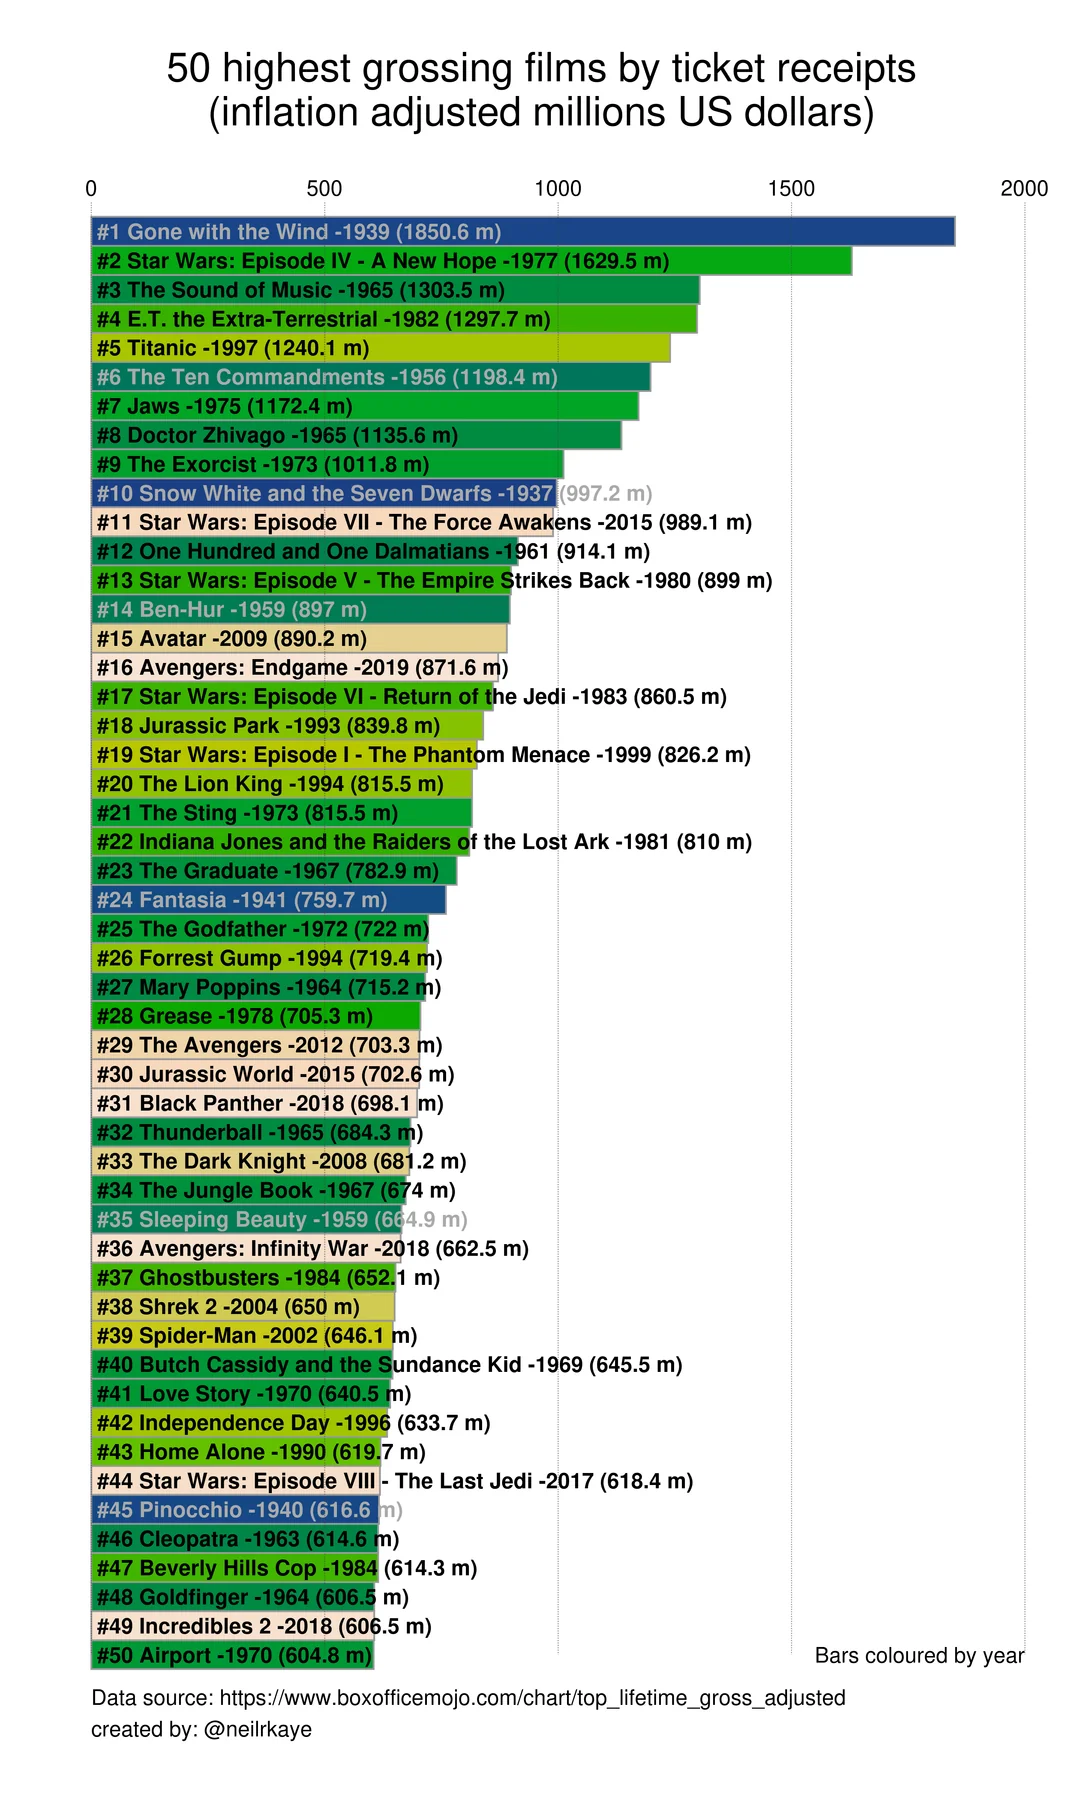

# 2. Data source information
#### 2.1 We found our dataset in Kaggle.com
https://www.kaggle.com/datasets/alanvourch/tmdb-movies-daily-updates

#### 2.2 Kaggle is a well known website were a lot of data analist and computer science professionals use to get datasets and show there work. The owner of the dataset updates movie daily.



#### 2.3 Our dataset didnt include any graphs, it was only data for the movies that were provided.

#### 2.4 Our dataset had provided us with more than enough information about each movie that was very helpful on our end to figure out correlations between the data.

### Importing Functions and Movie Data

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, balanced_accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import numpy as np


data = pd.read_csv("Movie.csv")
data

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,genres,production_companies,production_countries,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer
0,2,Ariel,7.082,304,Released,1988-10-21,0.0,73,0.0,tt0094675,...,"Drama, Comedy, Romance, Crime",Villealfa Filmproductions,Finland,suomi,"Markku Rantala, Esko Nikkari, Matti Pellonpää,...",Aki Kaurismäki,Timo Salminen,Aki Kaurismäki,Aki Kaurismäki,NaN
1,3,Shadows in Paradise,7.300,347,Released,1986-10-17,0.0,74,0.0,tt0092149,...,"Drama, Comedy, Romance",Villealfa Filmproductions,Finland,"suomi, English, svenska","Svante Korkiakoski, Bertta Pellonpää, Teuvo Ri...",Aki Kaurismäki,Timo Salminen,Aki Kaurismäki,Mika Kaurismäki,NaN
2,5,Four Rooms,5.800,2536,Released,1995-12-09,4257354.0,98,4000000.0,tt0113101,...,Comedy,"Miramax, A Band Apart",United States of America,English,"Lana McKissack, Valeria Golino, Kimberly Blair...","Quentin Tarantino, Alexandre Rockwell, Robert ...","Andrzej Sekula, Rodrigo García, Phil Parmet, G...","Quentin Tarantino, Alexandre Rockwell, Robert ...","Quentin Tarantino, Alexandre Rockwell, Lawrenc...",Combustible Edison
3,6,Judgment Night,6.527,316,Released,1993-10-15,12136938.0,109,21000000.0,tt0107286,...,"Action, Crime, Thriller","Largo Entertainment, JVC, Universal Pictures",United States of America,English,"Everlast, Peter Greene, Michael DeLorenzo, Den...",Stephen Hopkins,Peter Levy,"Jere Cunningham, Lewis Colick","Marilyn Vance, Gene Levy, Lloyd Segan",Alan Silvestri
4,8,Life in Loops (A Megacities RMX),7.500,27,Released,2006-01-01,0.0,80,42000.0,tt0825671,...,Documentary,inLoops,Austria,"English, हिन्दी, 日本語, Pусский, Español",NaN,Timo Novotny,Wolfgang Thaler,"Michael Glawogger, Timo Novotny","Ulrich Gehmacher, Timo Novotny",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911581,1266001,oooiiiooo,0.000,0,Released,NaN,0.0,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
911582,1266002,The Real Bros of Simi Valley: High School Reunion,0.000,0,Released,NaN,0.0,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
911583,1266003,Stop the Sweeps,0.000,0,Released,NaN,0.0,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
911584,1266004,"Hell, Purgatory, Paradise",0.000,0,Released,NaN,0.0,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Data Cleaning.
#### Firstly, we dropped columns that clearly wouldn't play a role in our machine learning model, such as id, imdb_id, original_title, music_composer, etc. After that, we created a list with all the remaining columns and then dropped any rows with blank values. Following this, we removed any movie data with a runtime of less than 40 minutes because, in order for something to be considered a movie, it should be more than 40 minutes long. We then changed the format of the release_date to datetime and retained all the dates that had a release date after 2010. Subsequently, we kept rows with revenue over 100 and reset the index.

In [20]:
# Drop specified columns from the DataFrame
data.drop(columns=['production_companies', 'writers', 'vote_count','id','director_of_photography','music_composer',
                   'overview','tagline','spoken_languages', 'original_title', 'cast', 'producers','status',
                   'imdb_id','director','production_countries','original_language'], inplace=True)

# Define a list of columns to consider for subset when dropping NA values
subset_cols = ['title', 'vote_average', 'revenue', 'runtime', 'budget', 
               'popularity', 'genres', 'release_date']

# Drop rows with NA values in the specified subset of columns
data.dropna(subset=subset_cols, inplace=True)

# Filter the DataFrame to keep only rows with runtime greater than or equal to 40 minutes
data = data[data['runtime'] >= 40]

# Convert 'release_date' column to datetime format
data['release_date'] = pd.to_datetime(data['release_date'])

# Filter the DataFrame to keep only rows with release date after or equal to 2010
data = data[data['release_date'].dt.year >= 2010]

# Filter the DataFrame to keep only rows with revenue greater than 100
data = data[data['revenue'] > 100]

# Reset the index after dropping rows
data.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
data


/tmp/ipykernel_2543/3875935943.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['release_date'] = pd.to_datetime(data['release_date'])


,title,vote_average,release_date,revenue,runtime,budget,popularity,genres
0,Sin City: A Dame to Kill For,6.369,2014-08-20,3.940000e+07,102,65000000.0,42.663,"Crime, Action, Thriller"
1,Captain America: The First Avenger,7.000,2011-07-22,3.705698e+08,124,140000000.0,56.862,"Action, Adventure, Science Fiction"
2,Pirates of the Caribbean: On Stranger Tides,6.547,2011-05-15,1.045700e+09,137,379000000.0,107.543,"Adventure, Action, Fantasy"
3,The Amazing Spider-Man,6.697,2012-06-23,7.579307e+08,136,215000000.0,79.504,"Action, Adventure, Science Fiction"
4,Scary Movie 5,4.800,2013-04-11,7.840000e+07,86,20000000.0,44.329,Comedy
...,...,...,...,...,...,...,...,...
7985,Zack Snyder’s Shark Tale,10.000,2024-03-17,2.700000e+08,288,150.0,1.400,"Comedy, Action, Animation, Adventure"
7986,The ULTIMATE Office Iceberg,8.000,2023-04-23,3.539000e+03,49,0.0,2.000,Documentary
7987,terrible miracles 2,0.000,2024-03-30,9.735430e+05,59,127542.0,11.374,Horror
7988,So Much To Do- So little Time,0.000,2024-07-23,1.067700e+05,147,45000.0,1.400,"Comedy, Music"


#### Here, we transformed the genre column into separate columns for each one, and then we one-hot encoded them to make it easier for our machine learning model to interpret.

In [21]:
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the 'genres' column
genres_encoded = mlb.fit_transform(data['genres'].str.split(', '))

# Create DataFrame with encoded genres
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)

# Concatenate encoded genres with the original DataFrame
data = pd.concat([data, genres_df], axis=1)

data

,title,vote_average,release_date,revenue,runtime,budget,popularity,genres,Action,Adventure,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,Sin City: A Dame to Kill For,6.369,2014-08-20,3.940000e+07,102,65000000.0,42.663,"Crime, Action, Thriller",1,0,...,0,0,0,0,0,0,0,1,0,0
1,Captain America: The First Avenger,7.000,2011-07-22,3.705698e+08,124,140000000.0,56.862,"Action, Adventure, Science Fiction",1,1,...,0,0,0,0,0,1,0,0,0,0
2,Pirates of the Caribbean: On Stranger Tides,6.547,2011-05-15,1.045700e+09,137,379000000.0,107.543,"Adventure, Action, Fantasy",1,1,...,0,0,0,0,0,0,0,0,0,0
3,The Amazing Spider-Man,6.697,2012-06-23,7.579307e+08,136,215000000.0,79.504,"Action, Adventure, Science Fiction",1,1,...,0,0,0,0,0,1,0,0,0,0
4,Scary Movie 5,4.800,2013-04-11,7.840000e+07,86,20000000.0,44.329,Comedy,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7985,Zack Snyder’s Shark Tale,10.000,2024-03-17,2.700000e+08,288,150.0,1.400,"Comedy, Action, Animation, Adventure",1,1,...,0,0,0,0,0,0,0,0,0,0
7986,The ULTIMATE Office Iceberg,8.000,2023-04-23,3.539000e+03,49,0.0,2.000,Documentary,0,0,...,0,0,0,0,0,0,0,0,0,0
7987,terrible miracles 2,0.000,2024-03-30,9.735430e+05,59,127542.0,11.374,Horror,0,0,...,0,1,0,0,0,0,0,0,0,0
7988,So Much To Do- So little Time,0.000,2024-07-23,1.067700e+05,147,45000.0,1.400,"Comedy, Music",0,0,...,0,0,1,0,0,0,0,0,0,0


#### Here we plotted a boxplot graph with popularity as our variable to see how our data was arranged.

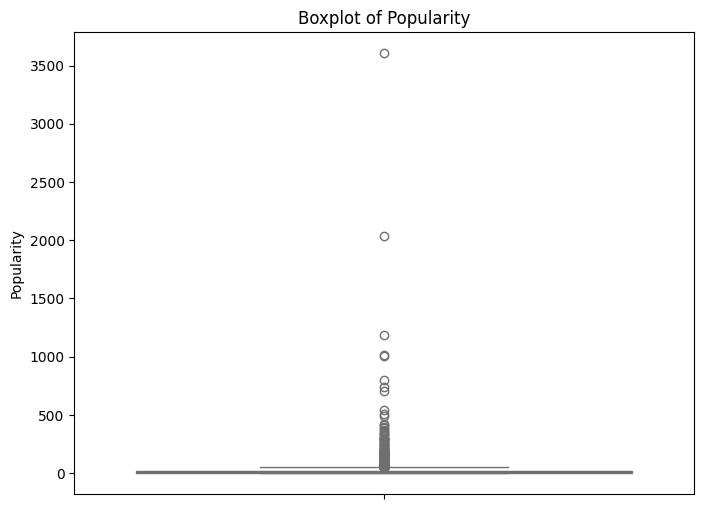

In [22]:
# Create a boxplot for popularity
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='popularity', color='skyblue')
plt.ylabel('Popularity')
plt.title('Boxplot of Popularity')
plt.show()

#### For better plotting we changed every value that was above 200 to be shown as a value of 200.

In [23]:
#anything over 200 will become only 200.
data['popularity'] = data['popularity'].clip(upper=200)

#### Here we replotted the boxplot graph

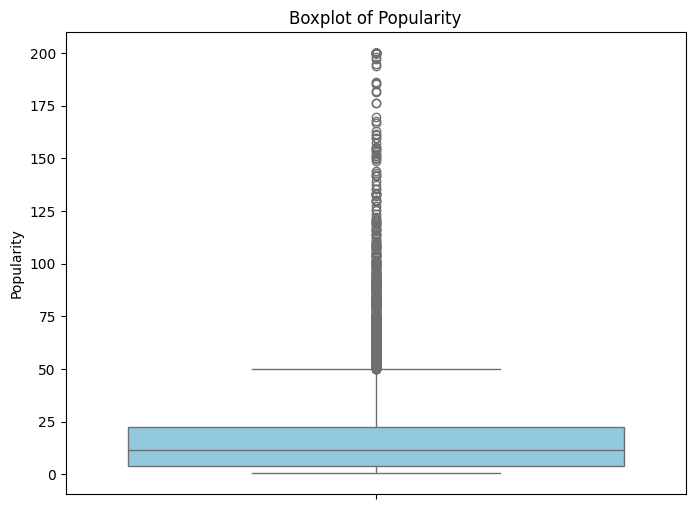

In [24]:
# Create a boxplot for popularity
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='popularity', color='skyblue')
plt.ylabel('Popularity')
plt.title('Boxplot of Popularity')
plt.show()

#### Here, we scaled the revenue, budget, popularity, runtime, and vote_average values from 0 (least) to 1 (most). Then, we created a new column named 'popular', where any movie with a popularity value over 0.6 was given a 1, and the rest were assigned 0. After that, we reset the index and dropped the release_date column since we no longer need it.

In [25]:
# Define the min-max scaling function
def min_max_scaling(x, min_val, max_val):
    return (x - min_val) / (max_val - min_val) * 10

# Get the minimum and maximum values of the 'popularity' column
min_popularity = data['popularity'].min()
max_popularity = data['popularity'].max()

columns_to_scale = ['revenue', 'budget','popularity','runtime','vote_average']

# Perform Min-Max scaling
data[columns_to_scale] = (data[columns_to_scale] - data[columns_to_scale].min()) / (data[columns_to_scale].max() - data[columns_to_scale].min())

#make new column if it is popular = 1 its 0.6 because it is the top 2% movie witht he higest popularity
data['popular'] = (data['popularity'] > 0.6).astype(int)

# Reset index
data.reset_index(drop=True, inplace=True)

data.drop(columns=['release_date'], inplace=True)
# Display the DataFrame after scaling
data

,title,vote_average,revenue,runtime,budget,popularity,genres,Action,Adventure,Animation,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,popular
0,Sin City: A Dame to Kill For,0.6369,1.407139e-02,0.081579,1.413043e-01,0.210948,"Crime, Action, Thriller",1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Captain America: The First Avenger,0.7000,1.323463e-01,0.110526,3.043478e-01,0.282156,"Action, Adventure, Science Fiction",1,1,0,...,0,0,0,0,1,0,0,0,0,0
2,Pirates of the Caribbean: On Stranger Tides,0.6547,3.734643e-01,0.127632,8.239130e-01,0.536324,"Adventure, Action, Fantasy",1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,The Amazing Spider-Man,0.6697,2.706895e-01,0.126316,4.673913e-01,0.395707,"Action, Adventure, Science Fiction",1,1,0,...,0,0,0,0,1,0,0,0,0,0
4,Scary Movie 5,0.4800,2.799996e-02,0.060526,4.347826e-02,0.219303,Comedy,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7985,Zack Snyder’s Shark Tale,1.0000,9.642854e-02,0.326316,3.260870e-07,0.004012,"Comedy, Action, Animation, Adventure",1,1,1,...,0,0,0,0,0,0,0,0,0,0
7986,The ULTIMATE Office Iceberg,0.8000,1.227143e-06,0.011842,0.000000e+00,0.007021,Documentary,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7987,terrible miracles 2,0.0000,3.476572e-04,0.025000,2.772652e-04,0.054032,Horror,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7988,So Much To Do- So little Time,0.0000,3.809536e-05,0.140789,9.782609e-05,0.004012,"Comedy, Music",0,0,0,...,0,1,0,0,0,0,0,0,0,0


# 4. Feature selection

#### We began by graphing the features we selected and cleaned initially to determine their importance in predicting whether a movie would be popular or not. We utilized RandomForestClassifier(), which is comprised of an ensemble of decision trees. Each tree is constructed from a bootstrap sample, which is a data sample drawn from the training set with replacement.

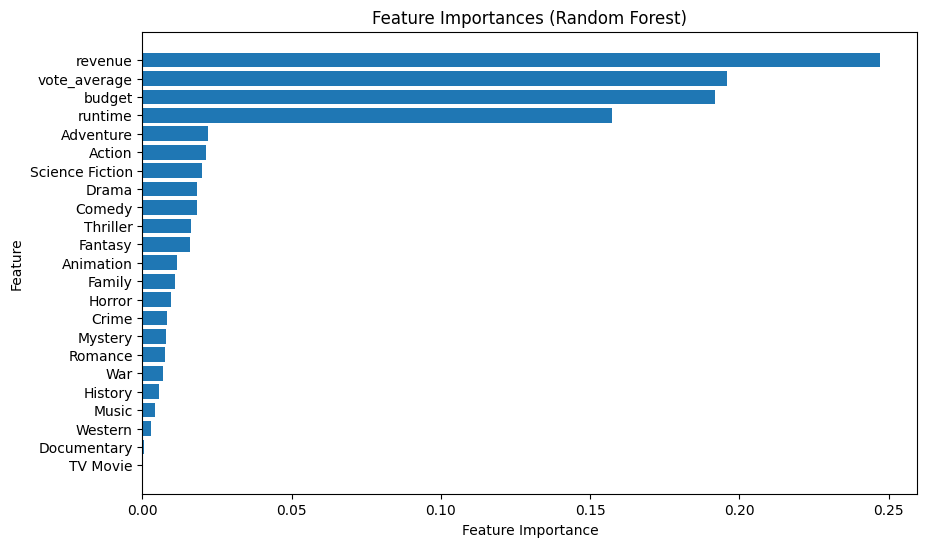

In [26]:
# Define numerical features and target variable
features = ['vote_average', 'revenue', 'runtime', 'budget', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
 'Family', 'Fantasy', 'History', 'Horror' ,'Music', 'Mystery', 'Romance',
 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']
target_variable = 'popular'

# Extract numerical features and target variable
X = data[features]
y = data[target_variable]

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Train the model
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Random Forest)')
plt.show()


#### We then realized that our graph was not well scaled, so we decided to graph only the specific genres that we had using the same RandomForestClassifier(). This was done to obtain a better visual representation in the graph for those features.

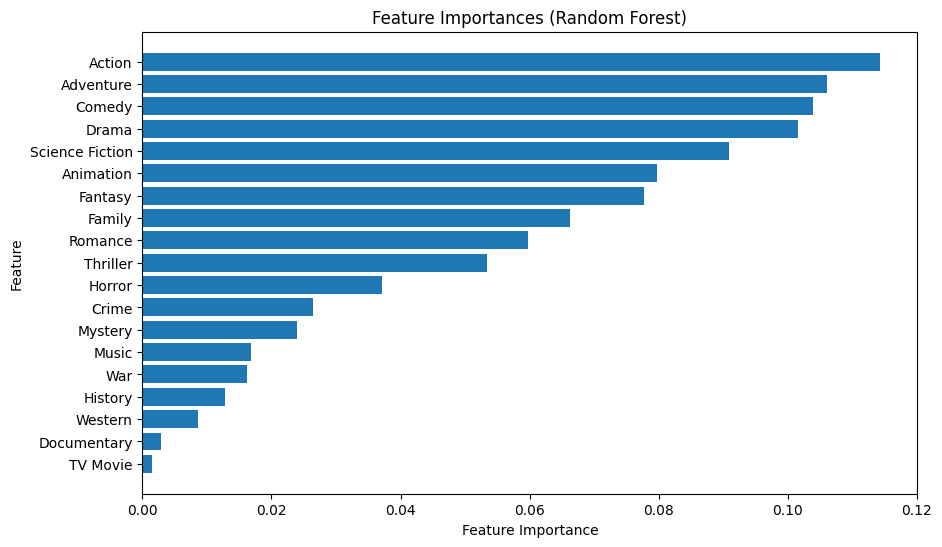

In [27]:
# genres feature importance
genres_features = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
 'Family', 'Fantasy', 'History', 'Horror' ,'Music', 'Mystery', 'Romance',
 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']
target_variable = 'popular'

# Extract numerical features and target variable
X = data[genres_features]
y = data[target_variable]

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Train the model
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': genres_features, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Random Forest)')
plt.show()


#### We then calculated the correlation between popular and all the other features we had. If the values were close to 1, it indicated a strong correlation.

In [28]:
# Extracting the relevant columns from the DataFrame
selected_data = data[features + [target_variable]]

# Calculating the correlation matrix
correlation_matrix = selected_data.corr()

# Extracting correlation coefficients with respect to the target variable
target_correlation = correlation_matrix[target_variable]

print("Correlation with the target variable 'popular':")
print(target_correlation)

Correlation with the target variable 'popular':
vote_average       0.065144
revenue            0.267446
runtime            0.070764
budget             0.291947
Action             0.096486
Adventure          0.101532
Animation          0.059957
Comedy            -0.007090
Crime             -0.007789
Documentary       -0.030432
Drama             -0.063056
Family             0.036622
Fantasy            0.051014
History            0.000984
Horror            -0.000923
Music             -0.011356
Mystery            0.004310
Romance           -0.024774
Science Fiction    0.097752
TV Movie          -0.006371
Thriller           0.005806
War                0.006115
Western            0.004227
popular            1.000000
Name: popular, dtype: float64


#### We created a graph based on the values we obtained to gain a better visual understanding of the correlations.

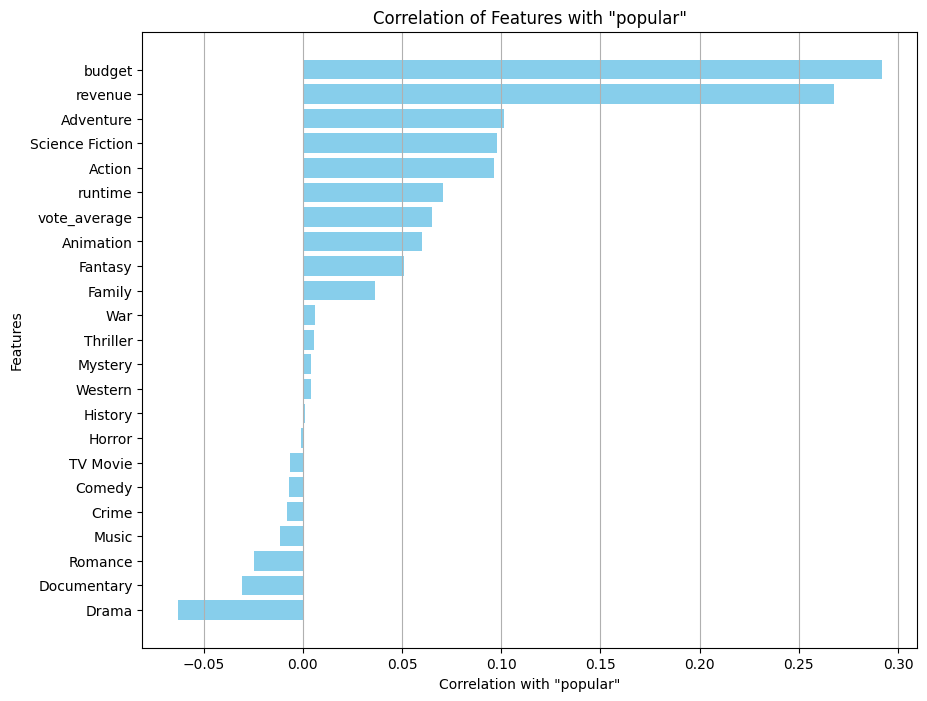

In [29]:
# Drop 'popular' from target_correlation since it's always 1
target_correlation = target_correlation.drop('popular')

# Sort features based on their correlation with 'popular'
sorted_features = target_correlation.sort_values()

# Create a bar plot
plt.figure(figsize=(10, 8))
plt.barh(sorted_features.index, sorted_features.values, color='skyblue')
plt.xlabel('Correlation with "popular"')
plt.ylabel('Features')
plt.title('Correlation of Features with "popular"')
plt.grid(axis='x')
plt.show()

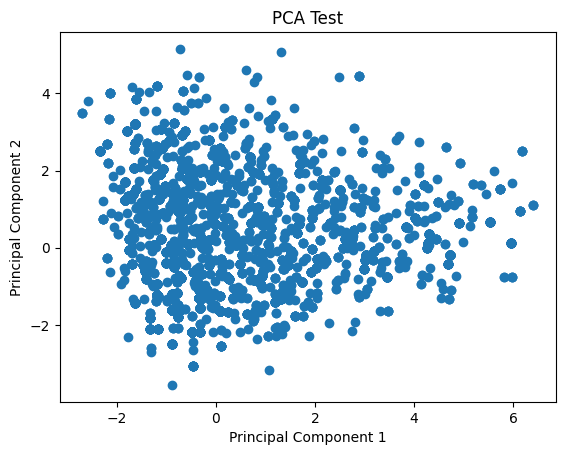

Explained variance ratio: [0.12251833 0.10370147]


In [30]:
# Assuming data is your DataFrame containing the dataset

# Extracting the numerical features from the DataFrame
X = data[genres_features]

# Standardizing the features (optional but recommended for PCA)
X_standardized = (X - X.mean()) / X.std()

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit PCA to the standardized data
pca.fit(X_standardized)

# Transform the data into the new feature space
X_pca = pca.transform(X_standardized)

# Plotting the transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Test')
plt.show()

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)


These two principal components explain approximately 22.62% of the total variance in the original dataset. This output suggests that the variance explained by each principal component is low.

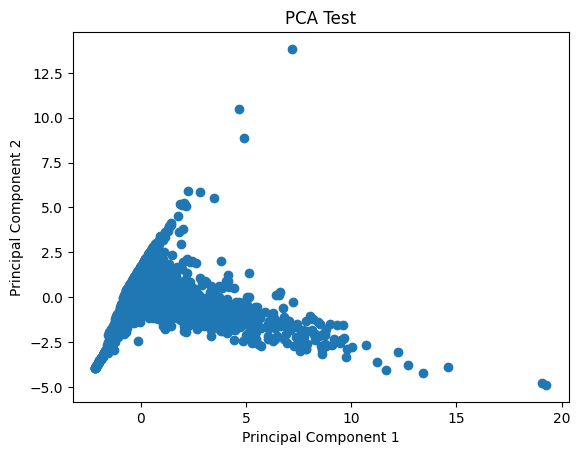

Explained variance ratio: [0.47783515 0.26169908]


In [31]:
# Assuming data is your DataFrame containing the dataset

# Selecting numerical features for PCA
numerical_features = ['vote_average', 'revenue', 'runtime', 'budget']

# Extracting the numerical features from the DataFrame
X = data[numerical_features]

# Standardizing the features (optional but recommended for PCA)
X_standardized = (X - X.mean()) / X.std()

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit PCA to the standardized data
pca.fit(X_standardized)

# Transform the data into the new feature space
X_pca = pca.transform(X_standardized)

# Plotting the transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Test')
plt.show()

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)


A significant portion of the variance is captured by the first two principal components, indicating that they are effective in summarizing the dataset's variability.Together, these two principal components explain approximately 74% of the total variance in the original dataset. 

# 5. Model selection and tuning

#### We selected 4 main features that had the most correlation with a movie being popular or not

In [32]:
numerical_features = ['vote_average', 'revenue', 'runtime', 'budget']
x = numerical_features

Here we tested 5 classifier to find the best machine learning model to use based on their balanced accuracy and we found out that Random Forest with 0.5202 and Gradient Boosting with 0.5596

In [33]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'Neural Network': MLPClassifier()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Calculate balanced accuracy
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    
    # Print balanced accuracy
    print(f'{name} Balanced Accuracy: {balanced_acc:.4f}')


Logistic Regression Balanced Accuracy: 0.5000


Random Forest Balanced Accuracy: 0.5202
Gradient Boosting Balanced Accuracy: 0.5596
Support Vector Machine Balanced Accuracy: 0.5000
Neural Network Balanced Accuracy: 0.5000


Here we tested 5 classifier to find the best machine learning model to use based on their recal and we found out that Random Forest with 0.0417 and Gradient Boosting with 0.1250

In [34]:
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'Neural Network': MLPClassifier()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Calculate recall score
    recall = recall_score(y_test, y_pred)
    
    # Print recall score
    print(f'{name} Recall: {recall:.4f}')


Logistic Regression Recall: 0.0000
Random Forest Recall: 0.0417
Gradient Boosting Recall: 0.1250
Support Vector Machine Recall: 0.0000
Neural Network Recall: 0.0000


## Random Forest

Here we run a normal random forest as our first machine learning model.

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier with class weights
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the testing data
y_prob = rf_classifier.predict_proba(X_test)[:, 1]  # Probabilities of belonging to class 1

# Adjust the threshold
threshold = 0.2  # this is where the f1 score is the highest. balanced both precision and recall.
y_pred_threshold = (y_prob > threshold).astype(int)  # Convert probabilities to binary predictions based on threshold

# Evaluation metrics
accuracy = balanced_accuracy_score(y_test, y_pred_threshold)
precision = precision_score(y_test, y_pred_threshold)
recall = recall_score(y_test, y_pred_threshold)
f1 = f1_score(y_test, y_pred_threshold)

print("Balanced Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Balanced Accuracy: 0.5590057179161372
Precision: 0.21428571428571427
Recall: 0.125
F1-score: 0.15789473684210525


Here we run a test to find the best parameters for the random forest.

In [36]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None] 
}

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define balanced accuracy as the scoring metric
scorer = make_scorer(balanced_accuracy_score)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring=scorer, cv=5)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Balanced Accuracy:", best_score)

Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
Best Balanced Accuracy: 0.6250491089185937


We then used the best parameters to get the best values for our random forest.

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier with best hyperparameters
rf_classifier = RandomForestClassifier(n_estimators=50, 
                                        max_depth=None, 
                                        min_samples_leaf=4, 
                                        min_samples_split=10, 
                                        class_weight='balanced', 
                                        random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the testing data
y_prob = rf_classifier.predict_proba(X_test)[:, 1]  # Probabilities of belonging to class 1

# Adjust the threshold
threshold = 0.2  # this is where the f1 score is the highest. balanced both precision and recall.
y_pred_threshold = (y_prob > threshold).astype(int)  # Convert probabilities to binary predictions based on threshold

# Evaluation metrics
accuracy = balanced_accuracy_score(y_test, y_pred_threshold)  # Calculate balanced accuracy
precision = precision_score(y_test, y_pred_threshold)
recall = recall_score(y_test, y_pred_threshold)
f1 = f1_score(y_test, y_pred_threshold)

print("Balanced Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Balanced Accuracy: 0.6286795849216433
Precision: 0.11475409836065574
Recall: 0.2916666666666667
F1-score: 0.16470588235294117


Then we did cross validation test to find the best number of folds for this model.

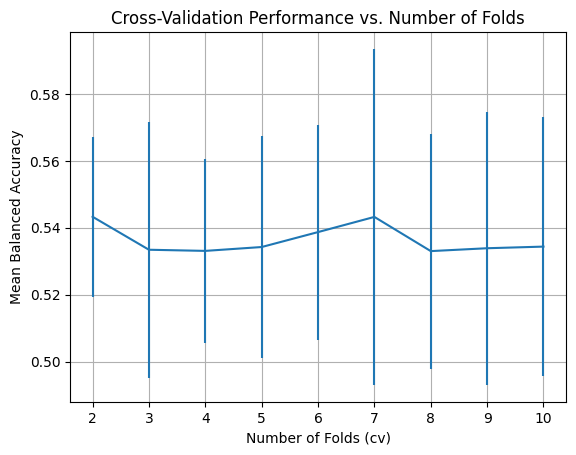

In [38]:
cv_values = range(2, 11)  # Test different values of cv from 2 to 10

mean_scores = []
std_scores = []

for cv in cv_values:
    clf = RandomForestClassifier() 
    scoring = make_scorer(balanced_accuracy_score)
    scores = cross_val_score(clf, X, y, cv=cv, scoring=scoring)
    mean_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(cv_values, mean_scores, yerr=std_scores)
plt.xlabel('Number of Folds (cv)')
plt.ylabel('Mean Balanced Accuracy')
plt.title('Cross-Validation Performance vs. Number of Folds')
plt.grid(True)
plt.show()


In [39]:
cv_scores = cross_val_score(rf_classifier, X, y, cv=2, scoring='recall')

print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.31372549 0.09803922]


The recall scores from cross-validation suggest that the classifier's ability to correctly identify relevant instances varies across the folds, with the first fold achieving a higher recall score compared to the second fold.

## Gradient Boost

Here we run a normal gradient boost as our first machine learning model.

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform oversampling to balance classes
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model on the resampled data
gb_classifier.fit(X_train_resampled, y_train_resampled)

# Predict probabilities on the testing data
y_prob = gb_classifier.predict_proba(X_test)[:, 1]  # Probabilities of belonging to class 1

# Adjust the threshold
threshold = 0.3  # this is where the f1 score is the highest. balanced both precision and recall.
y_pred_threshold = (y_prob > threshold).astype(int)  # Convert probabilities to binary predictions based on threshold

# Calculate balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_threshold)

# Calculate precision, recall, and f1-score
precision = precision_score(y_test, y_pred_threshold)
recall = recall_score(y_test, y_pred_threshold)
f1 = f1_score(y_test, y_pred_threshold)

# Print evaluation metrics
print("Balanced Accuracy:", balanced_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Balanced Accuracy: 0.7742481999152901
Precision: 0.07920792079207921
Recall: 0.6666666666666666
F1-score: 0.1415929203539823


Here we run a test to find the best parameters for the gredient boost.

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform oversampling to balance classes
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Define balanced accuracy as the scoring metric
scorer = make_scorer(balanced_accuracy_score)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, scoring=scorer, cv=5)

# Perform grid search
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Balanced Accuracy:", best_score)


Best Parameters: {'learning_rate': 1, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Balanced Accuracy: 0.9978619818232695


We then used the best parameters to get the best values for our gradient boost.

In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier with best hyperparameters
rf_classifier = RandomForestClassifier(n_estimators=100, 
                                        max_depth=7, 
                                        min_samples_leaf=2, 
                                        min_samples_split=10, 
                                        class_weight=None, 
                                        random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the testing data
y_prob = rf_classifier.predict_proba(X_test)[:, 1]  # Probabilities of belonging to class 1

# Adjust the threshold
threshold = 0.2  # this is where the f1 score is the highest. balanced both precision and recall.
y_pred_threshold = (y_prob > threshold).astype(int)  # Convert probabilities to binary predictions based on threshold

# Evaluation metrics
accuracy = balanced_accuracy_score(y_test, y_pred_threshold)
precision = precision_score(y_test, y_pred_threshold)
recall = recall_score(y_test, y_pred_threshold)
f1 = f1_score(y_test, y_pred_threshold)

# Print evaluation metrics
print("Balanced Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Balanced Accuracy: 0.5997193985599322
Precision: 0.2631578947368421
Recall: 0.20833333333333334
F1-score: 0.23255813953488372


Then we did cross validation test to find the best number of folds for this model.

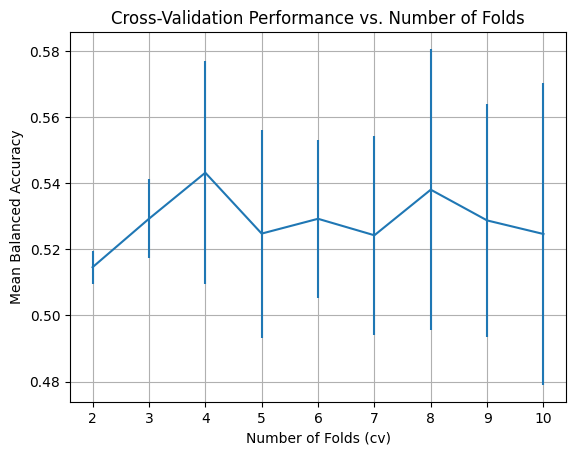

In [43]:
cv_values = range(2, 11)  # Test different values of cv from 2 to 10

mean_scores = []
std_scores = []

for cv in cv_values:
    clf = RandomForestClassifier(n_estimators=100, 
                                  max_depth=7, 
                                  min_samples_leaf=2, 
                                  min_samples_split=10, 
                                  class_weight=None, 
                                  random_state=42)
    scoring = make_scorer(balanced_accuracy_score)
    scores = cross_val_score(clf, X, y, cv=cv, scoring=scoring)
    mean_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(cv_values, mean_scores, yerr=std_scores)
plt.xlabel('Number of Folds (cv)')
plt.ylabel('Mean Balanced Accuracy')
plt.title('Cross-Validation Performance vs. Number of Folds')
plt.grid(True)
plt.show()



In [44]:
cv_scores = cross_val_score(rf_classifier, X, y, cv=4, scoring='recall')

print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.19230769 0.07692308 0.08       0.        ]


# 6. Explainability analysis

In progress...

# 7. Discussion


1. Can we predict whether a movie is popular or not?
2. We used random forest and gradient boost classifiers. Our class was imbalanced because only 2% of all the dataset comprised popular movies. Therefore, we focused on achieving high recall and balanced accuracy.
3. Based on the model we developed, we are confident that the machine can predict correctly. The machine exhibits low precision, which we attempted to balance, resulting in a potential for false positives. However, it demonstrates high accuracy. Thus, yes, it can predict whether a movie is popular or not.
4. Society may enjoy better-curated movies in the future. People's tastes could become more aligned due to how the machine predicts particular movies that are likely to become popular. If an individual's taste does not align with what the machine predicts, the machine may be of little use to that person. However, if the person's taste aligns with the machine's predictions of popular movies, they could benefit greatly from the machine.